In [1]:
# !pip install keras
# !nvidia-smi

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../") 

In [4]:
import os
os.environ['NVIDIA_VISIBLE_DEVICES'] = "1"
os.environ['CUDA_VISIBLE_DEVICES'] = "1"
os.environ

environ{'PATH': '/opt/conda/bin:/opt/conda/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin',
        'HOSTNAME': 'f9e6c529b843',
        'TERM': 'xterm-color',
        'NVIDIA_VISIBLE_DEVICES': '1',
        'CUDA_VERSION': '9.0.176',
        'CUDA_PKG_VERSION': '9-0=9.0.176-1',
        'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64',
        'NVIDIA_DRIVER_CAPABILITIES': 'compute,utility',
        'NVIDIA_REQUIRE_CUDA': 'cuda>=9.0',
        'NCCL_VERSION': '2.4.2',
        'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs',
        'CUDNN_VERSION': '7.4.2.24',
        'LANG': 'C.UTF-8',
        'HOME': '/root',
        'JPY_PARENT_PID': '6',
        'CLICOLOR': '1',
        'PAGER': 'cat',
        'GIT_PAGER': 'cat',
        'MPLBACKEND': 'module://ipykernel.pylab.backend_inline',
        'CUDA_VISIBLE_DEVICES': '1'}

In [5]:
# !python download_cvpr2016_cub.py

In [11]:
from download_cvpr2016_cub import DEFAULT_DIR, download_and_uncompress_dataset
from download_cvpr2016_flowers import DEFAULT_DIR as FLOWERS_DATA_DIR
from download_cvpr2016_flowers import DEFAULT_FLOWERS_DIR
from download_cvpr2016_cub import DEFAULT_CUB_DIR
from torch.utils.serialization import load_lua
import os
import numpy as np
from xian2017_cub_loader import Xian2017CubLoader
from xian2018_flowers_loader import Xian2018FlowersLoader
import matplotlib.pyplot as plt
import logging 
import importlib 
import scipy
importlib.reload(logging) 
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S') 
logging.info("starting...")


06:47:22 INFO:starting...


In [7]:
loader_trainval = Xian2017CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='trainval')
loader_trainval.load()

# loader_trainval.image_classes

07:45:33 INFO:Loading split trainval
07:45:33 INFO:Building vocabulary
07:45:34 INFO:Loading all raw texts
11788it [00:18, 647.01it/s]
07:45:56 INFO:Loading and tokenizing texts in split trainval
8821it [00:07, 1228.23it/s]
07:46:03 INFO:Loading word2vec embedding...


Number of tokens not found in the embedding: 1229 out of 5608


07:47:59 INFO:Loading precomputed features from /mnt/datasets/public/research/cvpr2016_cub/xlsa17/data/CUB/res101.mat ...


In [10]:
loader_test = Xian2017CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='test')
loader_test.load_cached()

09:59:43 INFO:Loading split test
09:59:43 INFO:Loading cached file /mnt/datasets/public/research/cvpr2016_cub/split_test_xian2017.pkl
09:59:45 INFO:Loaded cache in 1.998334 sec


In [ ]:
# from datasets.download_cvpr2016_flowers import DEFAULT_DIR, DEFAULT_FLOWERS_DIR

# from scipy import io
# import glob

# image_list = glob.glob(os.path.join(DEFAULT_DIR, DEFAULT_FLOWERS_DIR, "*.jpg"))
# image_list.sort()
# matfile = io.loadmat(os.path.join(DEFAULT_DIR, "imagelabels.mat"))
# labels = matfile["labels"].ravel()

# image_lines = []
# for img_path in image_list:
#     img_file_name = img_path.split(os.path.sep)[-1]
#     img_idx = int(img_file_name.split("_")[-1].split(".")[0])
#     label = labels[img_idx-1]
#     img_line = "%d %03d.%s" %(img_idx, label, img_file_name)
#     image_lines.append(img_line)

# with open(os.path.join(DEFAULT_DIR, DEFAULT_FLOWERS_DIR, "images.txt"), 'w') as f:
#     f.write("\n".join(image_lines))

# !ls '/mnt/datasets/public/research/cvpr2016_flowers/imagelabels.mat/jpg/images.txt'

In [19]:
flowers_loader_trainval = Xian2018FlowersLoader(data_dir="/mnt/datasets/public/research/cvpr2016_flowers/", 
                                        flowers_dir=DEFAULT_FLOWERS_DIR, split='trainval')
flowers_loader_trainval.load()

07:05:51 INFO:Loading split trainval
07:05:51 INFO:Building vocabulary
07:05:52 INFO:Loading all raw texts
8189it [00:03, 2663.99it/s]
07:05:57 INFO:Loading and tokenizing texts in split trainval
7034it [00:06, 1007.39it/s]
07:06:04 INFO:Loading word2vec embedding...


Number of tokens not found in the embedding: 1089 out of 5427


07:08:11 INFO:Loading precomputed features from /mnt/datasets/public/research/cvpr2016_flowers/cvpr18xian/data/FLO/res101.mat ...


In [43]:
a = flowers_loader_trainval.next_batch_features()

In [55]:
text = a[1]
text_len = a[2]

In [56]:
text[0]

array([[  4,   1,   5,   2,  10,   6,  11, 905,  11,  19,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  4,   1,  15,  11,  13,  18,   7,   2,  10,   6,  43,  24,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  8,  11,   1,   7, 394,  26,   2,  85,   8,  21,  30,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  4,   1,   5,  54,  29,  11,   2,   7,  40,  36,   3,  11,  19,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  4,   1,   5,   2,  10,   6,  11,   3,   5,  11,  19,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0]], dtype=int32)

In [57]:
text_len[1]

array([10, 10, 11, 11, 10])

In [12]:
from train import ModelLoader

pretrained_model_dir = '/mnt/home/boris/experiments_zeroshot_pairwise/190327_001724_embedding_size_text_feature_extractor_number_of_steps_repeat_weight_decay_fc_latent_dim_hidden_dim_num_texts_dropout_encoder_decoder_test/embedding_size=512;dropout=0;latent_dim=0;text_feature_extractor=cnn_bi_lstm;number_of_steps=100001;repeat=0;weight_decay_fc=0.0001;hidden_dim=0;num_texts=10'

max_text_len = loader_trainval.max_text_len
model = ModelLoader(model_path=pretrained_model_dir, 
                    batch_size=None, num_images=10, num_texts=10, max_text_len=max_text_len)

07:52:48 INFO:Searching for '/mnt/home/boris/experiments_zeroshot_pairwise/190327_001724_embedding_size_text_feature_extractor_number_of_steps_repeat_weight_decay_fc_latent_dim_hidden_dim_num_texts_dropout_encoder_decoder_test/embedding_size=512;dropout=0;latent_dim=0;text_feature_extractor=cnn_bi_lstm;number_of_steps=100001;repeat=0;weight_decay_fc=0.0001;hidden_dim=0;num_texts=10/params.json'
07:52:48 INFO:Loading existing params.


[None, 1, 30, 300]
Loading model
INFO:tensorflow:Restoring parameters from /mnt/home/boris/experiments_zeroshot_pairwise/190327_001724_embedding_size_text_feature_extractor_number_of_steps_repeat_weight_decay_fc_latent_dim_hidden_dim_num_texts_dropout_encoder_decoder_test/embedding_size=512;dropout=0;latent_dim=0;text_feature_extractor=cnn_bi_lstm;number_of_steps=100001;repeat=0;weight_decay_fc=0.0001;hidden_dim=0;num_texts=10/train/model-100000


In [13]:
metrics, _, _ = model.eval_acc(data_set=loader_test, batch_size=10)
metrics

07:52:53 INFO:Computing embeddings
297it [00:08, 57.18it/s]
07:53:01 INFO:Computing metrics
 32%|███▏      | 963/2967 [00:00<00:00, 9620.63it/s]

Compute KD-tree


100%|██████████| 50/50 [00:00<00:00, 411.19it/s]


{'AP@50/#sentences10': 0.38679999999999992,
 'Top-1 Acc/#sentences10': 0.40815638692281764,
 'AP@50/#sentences50': 0.45280000000000004,
 'Top-1 Acc/#sentences50': 0.5520728008088979,
 'AP@50/#sentences100': 0.46559999999999996,
 'Top-1 Acc/#sentences100': 0.58948432760364,
 'AP@50/#sentences200': 0.48320000000000002,
 'Top-1 Acc/#sentences200': 0.6154364678126053,
 'AP@50/#sentences400': 0.49319999999999992,
 'Top-1 Acc/#sentences400': 0.6228513650151668,
 'AP@50/#sentences1000': 0.48759999999999998,
 'Top-1 Acc/#sentences1000': 0.6285810583080553}

In [67]:
metrics, embeddings = model.eval_acc_gzsh(train_loader=loader_trainval, test_loader=loader_test, batch_size=10)
seen_unseen_text_embeddings, image_embeddings_train, image_embeddings_test = embeddings
metrics

12:18:43 INFO:Computing train embeddings
883it [00:13, 66.64it/s]
12:18:57 INFO:Computing test embeddings
297it [00:04, 66.29it/s]
12:19:01 INFO:Computing generalized zero-shot performance metrics
100%|██████████| 6/6 [00:33<00:00,  5.63s/it]


{'test_U_Top-1 Acc/#sentences10': 0.30712656653764581,
 'test_S_Top-1 Acc/#sentences10': 0.31067775738034781,
 'test_H_Top-1 Acc/#sentences10': 0.30889195568824646,
 'test_U_Top-1 Acc/#sentences50': 0.48554183547816754,
 'test_S_Top-1 Acc/#sentences50': 0.45517378439956541,
 'test_H_Top-1 Acc/#sentences50': 0.46986764133380365,
 'test_U_Top-1 Acc/#sentences100': 0.49311726191132593,
 'test_S_Top-1 Acc/#sentences100': 0.49712601465838624,
 'test_H_Top-1 Acc/#sentences100': 0.49511352406738679,
 'test_U_Top-1 Acc/#sentences200': 0.52296639607465678,
 'test_S_Top-1 Acc/#sentences200': 0.52371227658750186,
 'test_H_Top-1 Acc/#sentences200': 0.5233390705676918,
 'test_U_Top-1 Acc/#sentences400': 0.53337540222533442,
 'test_S_Top-1 Acc/#sentences400': 0.52190299498455428,
 'test_H_Top-1 Acc/#sentences400': 0.52757683774915198,
 'test_U_Top-1 Acc/#sentences1000': 0.54197231207823382,
 'test_S_Top-1 Acc/#sentences1000': 0.5278036438448731,
 'test_H_Top-1 Acc/#sentences1000': 0.5347941493620250

In [29]:

image_id = 4514
print(flowers_loader_trainval.image_file_names[image_id])
flowers_loader_trainval.raw_texts[image_id]

image_04997.jpg


['this flower has myriad small yellow petals that form a spherical bubble around the flower',
 'this flower is yellow in color, with petals that are bunched together closely.',
 'this flower has petals that are yellow and ruffled together',
 'the petals of this flower are orange with a short stigma',
 'this flower has petals that are overlapping and yellow and green pedicel.',
 'this flower has a rounded mound of tiny petals which are orange and ruffled.',
 'the small petals of the flower are semi ruffled, and consist of a vibrant yellow color.',
 'a large golden flower with green leaves attached to it.',
 'this flower has multiple rows of yellow ribbon like petals that wind tighter closer to the pistil.',
 'this flower has yellow petals as well as a green sepal.']

In [131]:
batch_features, batch_texts, batch_text_lengths, \
    labels_txt2img, class_labels = loader_trainval.next_batch_features()


for batch_features, batch_texts, text_lengths_out in loader_trainval.sequential_evaluation_batches_features():
    
    break
    
batch_features[0]

array([[ 0.17475714,  0.01691125,  0.01377538, ...,  0.60658473,
         0.        ,  0.        ],
       [ 0.17475714,  0.01691125,  0.01377538, ...,  0.60658473,
         0.        ,  0.        ],
       [ 0.17475714,  0.01691125,  0.01377538, ...,  0.60658473,
         0.        ,  0.        ],
       ..., 
       [ 0.17475714,  0.01691125,  0.01377538, ...,  0.60658473,
         0.        ,  0.        ],
       [ 0.17475714,  0.01691125,  0.01377538, ...,  0.60658473,
         0.        ,  0.        ],
       [ 0.17475714,  0.01691125,  0.01377538, ...,  0.60658473,
         0.        ,  0.        ]])

In [98]:
import scipy

image_features_path = os.path.join(loader_trainval.xlsa17_dir, "res101.mat")
image_features = scipy.io.loadmat(image_features_path)
image_file_names = {n[0].split("/")[-1]: f for n,f in zip(image_features['image_files'].ravel(), image_features['features'].transpose())}

In [101]:
image_features['image_files']
print(image_features.keys())

zip(image_features['image_files'].ravel(), image_features['features'].transpose())
image_file_names['Black_Footed_Albatross_0001_796111.jpg'].shape

dict_keys(['__header__', '__version__', '__globals__', 'image_files', 'features', 'labels'])


(2048,)

In [115]:
len(loader_trainval.image_file_names)

8821

In [23]:
# loader_train = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='train')
# loader_test = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='test')
# loader_val = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='val')
# loader_all = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='all')
loader_trainval = Xian2017CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='trainval')

In [24]:
# loader_train = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='train')
# loader_test = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='test')
# loader_val = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='val')
# loader_all = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='all')
# loader_trainval = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='trainval')

In [28]:
# loader_train.load()
loader_trainval.load()
# loader_test.load()
# loader_val.load()
# loader_all.load()

loader_trainval.data_dir

08:52:03 INFO:Loading split trainval


AttributeError: 'Xian2017CubLoader' object has no attribute 'xlsa17_dir'

['the large bird in the water has red eyes, a long white neck, and a gray and white back.',
 'waterfowl with triangular beak of medium length, white cheeks, black long neck with white front, and gray back.',
 'this bird has a red eyering, dark brown and black head, throat, and grey and white covering the rest of its body.',
 'large bird with a long brown & white neck- has red eyes and a long beak.',
 'this long necked bird has a brown neck, white cheek patches, and a distinctive red eye.',
 'this particular bird has a gray beak and red eyes',
 'this bird is white and brown in color, with alight colored beak.',
 'a large black and white bird with a long skinny neck, a red eye, and a short pointy beak.',
 'this bird has wings that are grey and has a long neck and red eyes',
 'this bird has wings that are brown and has red eyes']

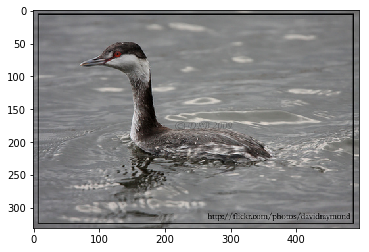

In [44]:
image_id = 1000
plt.imshow(loader_test.raw_images[image_id])
loader_test.raw_texts[image_id]

In [73]:
images, texts, text_lengths = loader_train.next_batch(batch_size=64, num_images=2, num_texts=5)

[15 11 10 10 16]
[[ 1  3  4  1 99  8 30 18  8 92  2 26 61  2 17  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 1 13 29  3  4  1  6 23  2 26 11  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 7  3  5  1 31 17  2  1  6 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 7  3  5  1 31 17  2  1  6 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 1 13  8  3  4  1  6 23  1 13 11  4  1 18  8 38  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]]
a small gray bird with a black head and orange beak


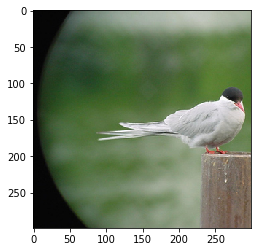

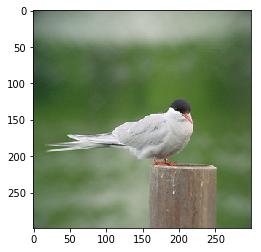

In [99]:
print(text_lengths[0])
print(texts[0])

print(" ".join([loader_train.tokenizer.index_word[i] for i in texts[0][1] if i > 0]))

plt.imshow(images[0][0])
plt.show()
plt.imshow(images[0][1])

In [5]:
loader_trainval = Cvpr2016CubLoader(data_dir=DEFAULT_DIR, cub_dir=DEFAULT_CUB_DIR, split='trainval')
loader_trainval.load_cached()


Loading split trainval
Loading cached file /mnt/datasets/public/research/cvpr2016_cub/split_trainval.pkl
Loaded cache in 59.26743674278259 sec


In [7]:
a = loader_trainval.next_batch_features()
a[-1].dtype

dtype('int64')

In [12]:
set(loader_trainval.image_classes)

{'002',
 '003',
 '005',
 '007',
 '010',
 '011',
 '012',
 '013',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '024',
 '025',
 '026',
 '027',
 '028',
 '030',
 '032',
 '039',
 '040',
 '041',
 '042',
 '044',
 '045',
 '046',
 '047',
 '048',
 '050',
 '052',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '063',
 '064',
 '065',
 '067',
 '068',
 '069',
 '070',
 '071',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '080',
 '081',
 '082',
 '085',
 '087',
 '088',
 '089',
 '090',
 '092',
 '093',
 '094',
 '097',
 '099',
 '100',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '113',
 '115',
 '116',
 '117',
 '118',
 '120',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '131',
 '132',
 '133',
 '134',
 '136',
 '137',
 '139',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '148',
 '149',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '157',
 '158',
 '159',
 '160',
 '161',
 '162',
 '164',
 '167',
 '168',
 '169',
